<a href="https://colab.research.google.com/github/IrinaBolshagina/Comics/blob/main/1.Image_caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. import pictures
2. caption image and detect the theme
3. generate a story

In [20]:
#imports
from IPython.display import display
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration


In [21]:
img_urls = [
    'https://expertphotography.b-cdn.net/wp-content/uploads/2022/06/Birthday-Photoshoot-Ideas-surprise.jpg',
    'https://img.freepik.com/free-photo/indoor-portrait-amazing-female-model-trendy-t-shirt-touching-her-long-shiny-hair_197531-6512.jpg',
    'https://expertphotography.b-cdn.net/wp-content/uploads/2022/06/Birthday-Photoshoot-Ideas-pool-party.jpg',
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQEWGvDGqJ4FvpuUWT0PXxgoY9utJd-GtR9A&usqp=CAU',
    'https://play-lh.googleusercontent.com/on623rjZr4fRqI1YCTfOthkLzS6RSTJY5WhGWj9iO5EpWJDWNnmBuW_dcreZVoyx4Q'

]

In [22]:
import requests
from io import BytesIO
from PIL import Image

def download_images_from_urls(urls):
    images = []
    for url in urls:
        response = requests.get(url)
        img = Image.open(requests.get(url, stream=True).raw).convert('RGB')
        images.append(img)
    return images



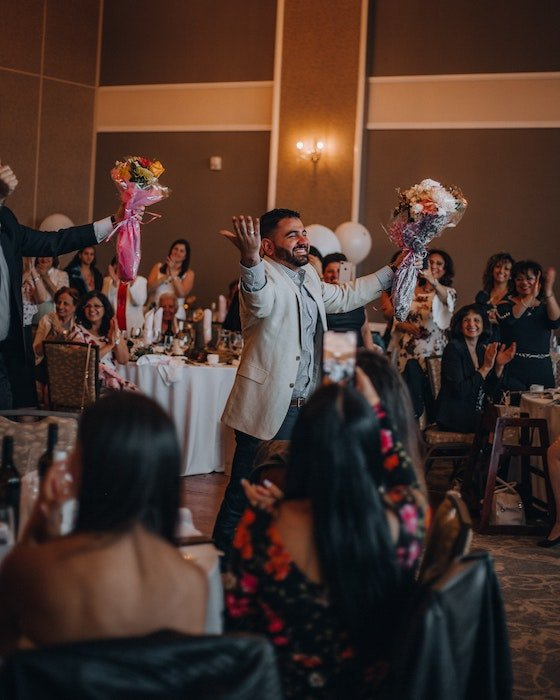

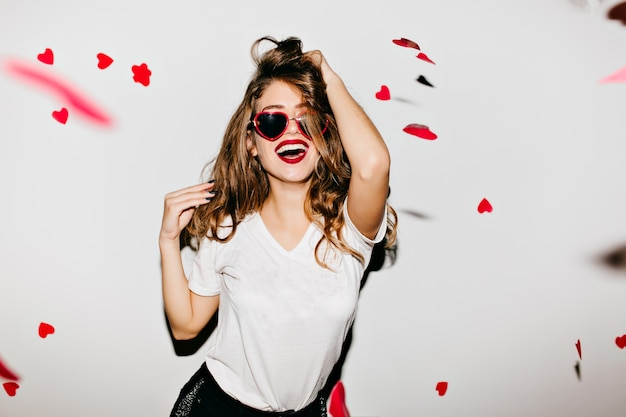

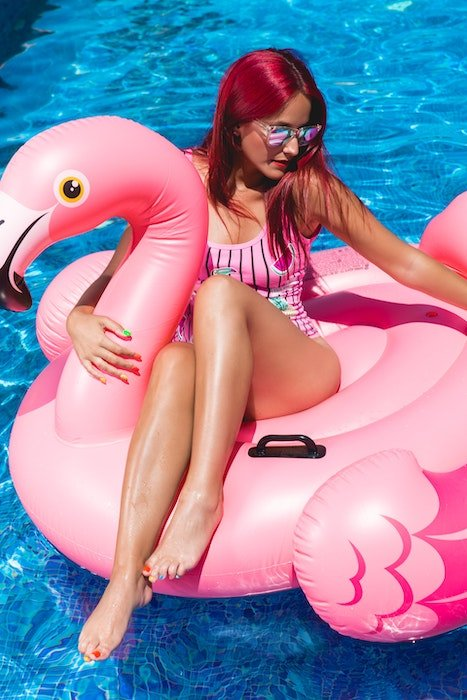

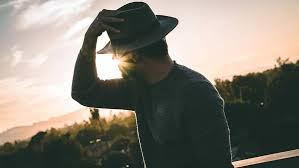

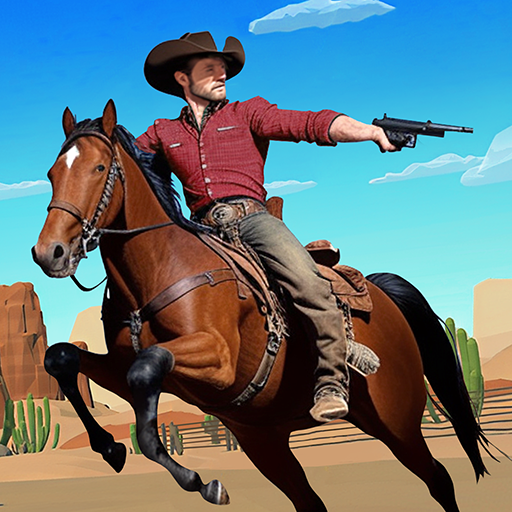

In [23]:

downloaded_images = download_images_from_urls(img_urls)

for img in downloaded_images:
  display(img)

In [24]:

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

img_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQEWGvDGqJ4FvpuUWT0PXxgoY9utJd-GtR9A&usqp=CAU'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))
# >>> a photography of a woman and her dog

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))



/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a man wearing a hat
a man standing on a bridge


In [25]:
def get_img_description(img):

  #using model
  processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
  model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

  # unconditional image captioning
  inputs = processor(img, return_tensors="pt")
  out = model.generate(**inputs)
  return(processor.decode(out[0], skip_special_tokens=True))

In [26]:
img_descriptions = []
for img in downloaded_images:
  img_descriptions.append(get_img_description(img))
print(img_descriptions)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['a man in a suit and tie is dancing with his friends', 'a woman in a white shirt and black pants with red hearts', 'a woman in a pink flamingo swimsuit sitting on an inflatable', 'a man standing on a bridge', 'a man riding a horse']
